<a href="https://colab.research.google.com/github/JesseRed/Colab/blob/master/GAN_Fashion_own_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_datasets as tfds
import tensorflow as tf

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [64]:
buffer_size = 1000
batch_size = 32
dataset = tfds.load(name='fashion_mnist', split='train')
train_ds = dataset.map(lambda item: tf.dtypes.cast(tf.squeeze(item['image']), tf.float32)/255)
print(type(train_ds))
print(train_ds.element_spec)
train_ds = train_ds.shuffle(buffer_size= buffer_size).batch(32, drop_remainder=True).prefetch(1)
print(type(train_ds))
print(train_ds.element_spec)
coding_size = 30

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
TensorSpec(shape=(28, 28), dtype=tf.float32, name=None)
<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
TensorSpec(shape=(32, 28, 28), dtype=tf.float32, name=None)


# Generator
functional implementation

In [0]:

inputs = tf.keras.Input(shape=(codings,))
dense = Dense(100, activation='selu')
x = dense(inputs)
x = Dense(150, activation= 'selu')(x)
x = Dense(28*28, activation='sigmoid')(x)
output = tf.keras.layers.Reshape((28,28))(x)
generator = tf.keras.Model(inputs=inputs, outputs = output, name = 'fashion_functional_generator')

#Discriminator
functional implementation

In [0]:
inputs = tf.keras.Input(shape=(28,28))
dense = Dense(100, activation='selu')
x = dense(inputs)
x = Dense(100, activation='selu')(x)
output = Dense(1,activation='sigmoid')(x)
discriminator = tf.keras.Model(inputs=inputs, outputs= output, name = 'fashion_functional_discriminator')

In [0]:
gan = tf.keras.Sequential([generator, discriminator])

In [0]:
discriminator.compile(loss='binary_crossentropy', optimizer='rmsprop')
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

Training Function
  

In [0]:
def train_gan(gan, dataset, batch_size, coding_size, n_epochs):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    print(f"epoch = {epoch}")
    for X_batch in dataset:
      # hole fake bilder vom generator
      # erstelle noise
      noise = tf.random.normal(shape = [batch_size,coding_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images,X_batch], axis = 0)
      y1 = tf.constant([[0.]]*batch_size + [[1.]]*batch_size)
      discriminator.trainable = True
      # tue sie zusammen mit echten und trainiere den Discriminator
      discriminator.train_on_batch(X_fake_and_real, y1)

      discriminator.trainable = False
      # noi
      noise = tf.random.normal(shape = [batch_size, coding_size])
      y2 = tf.constant([[1.]]*batch_size)
      gan.train_on_batch(noise,y2)


In [70]:
train_gan(gan, train_ds, batch_size, codings, 20)

epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8
epoch = 9
epoch = 10
epoch = 11
epoch = 12
epoch = 13
epoch = 14
epoch = 15
epoch = 16
epoch = 17
epoch = 18
epoch = 19


<class 'numpy.ndarray'>


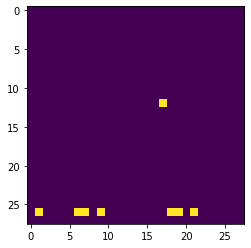

In [63]:
noise = tf.random.normal(shape=[1, coding_size])
gen_images = generator.predict(noise)
print(type(gen_images))
plt.imshow(np.squeeze(gen_images, axis = 0))